In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
timeline_df_redo = pd.read_excel ('../Data/TEIS-NSS Project Data 10-2022.xlsx', sheet_name='Elig Timeline Rpt 2018-2022')
timeline_df_redo

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67605,UC,509553,Inactive,IFSP,2021-10-03,2021-10-22,System,2021-08-19,2021-08-26,2021-08-23 00:00:00,...,0.0,3.0,35.0,47.0,54.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2021-10-12,2021-12-10,618 - Moved out of state
67606,UC,509684,Inactive,IFSP,2021-10-07,2021-09-07,NaN,2021-08-23,2021-08-31,2021-08-24 00:00:00,...,0.0,7.0,0.0,2.0,10.0,Eligible,Developmental Evaluation,2021-09-02,2022-03-07,618 - Parent withdraw
67607,UC,526338,Inactive,IFSP,2022-05-22,2022-05-05,NaN,2022-04-07,2022-04-10,2022-04-08 00:00:00,...,1.0,3.0,0.0,2.0,6.0,Eligible,Developmental Evaluation,2022-04-13,2022-07-25,618 - Parent withdraw
67608,UC,511641,Inactive,Eligibility,2021-11-22,NaT,NaN,2021-10-08,2021-10-18,2021-10-11 00:00:00,...,0.0,7.0,NaN,11.0,21.0,Eligible,Diagnosed Condition,2021-10-29,2022-06-22,Parent decline


In [7]:
timeline_df_redo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   District                                          67610 non-null  object        
 1   Child ID                                          67610 non-null  int64         
 2   Child Status                                      67610 non-null  object        
 3   Child Phase                                       67610 non-null  object        
 4   Init. IFSP Due Date                               67610 non-null  datetime64[ns]
 5   IFSP Due Date                                     33237 non-null  datetime64[ns]
 6   IFSP Late Reason                                  4780 non-null   object        
 7   Active Ref. Date                                  67610 non-null  datetime64[ns]
 8   Parent Consent/Intake Date

In [8]:
timeline_df_redo['Exit Reason'].value_counts()

Parent decline                                                          12725
Ineligible for Part C                                                   10340
Unable to contact                                                        8748
618 - Parent withdraw                                                    7111
618 - Part B eligibility not determined                                  6715
618 - Part B eligible                                                    5508
618 - Attempts to contact unsuccessful                                   2721
No meeting occurred                                                      1920
618 - Moved out of state                                                 1052
618 - Not eligible for Part B – Exit with referral to other programs      938
618 - Not eligible for Part B – Exit with no referrals                    704
Referral less than 45 days                                                608
618 - Completion of IFSP/ no longer requires services           

In [159]:
timeline_df_redo['Init. Elig. Category'].value_counts()

Developmental Evaluation                         28317
Diagnosed Condition, Developmental Evaluation     5298
Diagnosed Condition                               4675
Name: Init. Elig. Category, dtype: int64

number of children in each exit reason category are less on the exit_df_redo because it's only taking into account kids who had outcomes. The timeline_df_redo include kids who did not even start the program and also didn't finish. 

In [9]:
exit_df_redo = pd.read_excel ('../Data/TEIS-NSS Project Data 10-2022.xlsx', sheet_name='ECO with Exit21-22')
exit_df_redo

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,UC,514216.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,65.0,-44537.0,-44537.0
8632,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8633,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8634,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
timeline_df_redo_drop=timeline_df_redo[['Child ID', 'Init. Elig. Category', 'Exit Reason']]
timeline_df_redo_drop

,Child ID,Init. Elig. Category,Exit Reason
0,453926,Developmental Evaluation,618 - Part B eligible
1,431729,"Diagnosed Condition, Developmental Evaluation",618 - Part B eligibility not determined
2,462474,Developmental Evaluation,618 - Part B eligibility not determined
3,446841,Diagnosed Condition,Parent decline
4,459629,Developmental Evaluation,618 - Parent withdraw
...,...,...,...
67605,509553,"Diagnosed Condition, Developmental Evaluation",618 - Moved out of state
67606,509684,Developmental Evaluation,618 - Parent withdraw
67607,526338,Developmental Evaluation,618 - Parent withdraw
67608,511641,Diagnosed Condition,Parent decline


In [42]:
timeline_df_redo_drop['Exit Reason'] = timeline_df_redo_drop['Exit Reason'].str.strip('618 -')
timeline_df_redo_drop

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_15472\3988784329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeline_df_redo_drop['Exit Reason'] = timeline_df_redo_drop['Exit Reason'].str.strip('618 -')


,Child ID,Init. Elig. Category,Exit Reason
0,453926,Developmental Evaluation,Part B eligible
1,431729,"Diagnosed Condition, Developmental Evaluation",Part B eligibility not determined
2,462474,Developmental Evaluation,Part B eligibility not determined
3,446841,Diagnosed Condition,Parent decline
4,459629,Developmental Evaluation,Parent withdraw
...,...,...,...
67605,509553,"Diagnosed Condition, Developmental Evaluation",Moved out of state
67606,509684,Developmental Evaluation,Parent withdraw
67607,526338,Developmental Evaluation,Parent withdraw
67608,511641,Diagnosed Condition,Parent decline


In [43]:
timeline_df_redo_drop_agg = timeline_df_redo_drop.groupby(['Init. Elig. Category', 'Exit Reason']).count()
timeline_df_redo_drop_agg

Child ID
Init. Elig. Category                          Exit Reason                                                 
Developmental Evaluation                      Attempts to contact unsuccessful                        1923
                                              Completion of IFSP/ no longer requires services          218
                                              Deceased                                                  23
                                              Moved out of state                                       760
                                              No meeting occurred                                      250
                                              Not eligible for Part B – Exit with no referrals         590
                                              Not eligible for Part B – Exit with referral to...       758
                                              Parent decline                                          1753
                                              Parent withdraw                                         5277
                                              Part B eligibility not determined                       5550
                                              Part B eligible                                         4560
                                              Referral less than 45 days                                22
                                              Screening – No action is required                          1
                                              Unable to contact                                       1134
Diagnosed Condition                           Attempts to contact unsuccessful                         343
                                              Completion of IFSP/ no longer requires services           38
                                              Deceased                                                  11
                                              Moved out of state                                       122
                                              No meeting occurred                                       69
                                              Not eligible for Part B – Exit with no referrals          57
                                              Not eligible for Part B – Exit with referral to...        94
                                              Parent decline                                           842
                                              Parent withdraw                                          910
                                              Part B eligibility not determined                        550
                                              Part B eligible                                          347
                                              Referral less than 45 days                                 4
                                              Unable to contact                                        331
Diagnosed Condition, Developmental Evaluation Attempts to contact unsuccessful                         455
                                              Completion of IFSP/ no longer requires services           22
                                              Deceased                                                  28
                                              Moved out of state                                       170
                                              No meeting occurred                                       57
                                              Not eligible for Part B – Exit with no referrals          57
                                              Not eligible for Part B – Exit with referral to...        86
                                              Parent decline                                           314
                                              Parent withdraw                                          923
                                

In [44]:
timeline_df_redo_drop_agg_index=timeline_df_redo_drop_agg.reset_index()
timeline_df_redo_drop_agg_index

,Init. Elig. Category,Exit Reason,Child ID
0,Developmental Evaluation,Attempts to contact unsuccessful,1923
1,Developmental Evaluation,Completion of IFSP/ no longer requires services,218
2,Developmental Evaluation,Deceased,23
3,Developmental Evaluation,Moved out of state,760
4,Developmental Evaluation,No meeting occurred,250
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758
7,Developmental Evaluation,Parent decline,1753
8,Developmental Evaluation,Parent withdraw,5277
9,Developmental Evaluation,Part B eligibility not determined,5550


In [45]:
dev_eval =timeline_df_redo_drop_agg_index.loc[timeline_df_redo_drop_agg_index['Init. Elig. Category'].isin(['Developmental Evaluation'])]
dev_eval

,Init. Elig. Category,Exit Reason,Child ID
0,Developmental Evaluation,Attempts to contact unsuccessful,1923
1,Developmental Evaluation,Completion of IFSP/ no longer requires services,218
2,Developmental Evaluation,Deceased,23
3,Developmental Evaluation,Moved out of state,760
4,Developmental Evaluation,No meeting occurred,250
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758
7,Developmental Evaluation,Parent decline,1753
8,Developmental Evaluation,Parent withdraw,5277
9,Developmental Evaluation,Part B eligibility not determined,5550


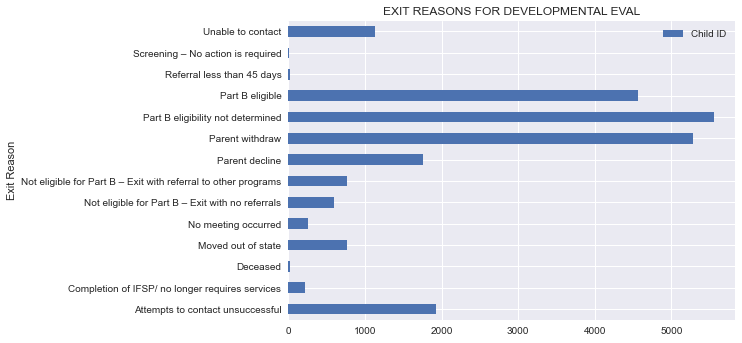

In [46]:
dev_eval_chart = dev_eval.plot(title="EXIT REASONS FOR DEVELOPMENTAL EVAL", x='Exit Reason', y=['Child ID'], kind='barh')




In [47]:
diag_eval =timeline_df_redo_drop_agg_index.loc[timeline_df_redo_drop_agg_index['Init. Elig. Category'].isin(['Diagnosed Condition'])]
diag_eval

,Init. Elig. Category,Exit Reason,Child ID
14,Diagnosed Condition,Attempts to contact unsuccessful,343
15,Diagnosed Condition,Completion of IFSP/ no longer requires services,38
16,Diagnosed Condition,Deceased,11
17,Diagnosed Condition,Moved out of state,122
18,Diagnosed Condition,No meeting occurred,69
19,Diagnosed Condition,Not eligible for Part B – Exit with no referrals,57
20,Diagnosed Condition,Not eligible for Part B – Exit with referral t...,94
21,Diagnosed Condition,Parent decline,842
22,Diagnosed Condition,Parent withdraw,910
23,Diagnosed Condition,Part B eligibility not determined,550


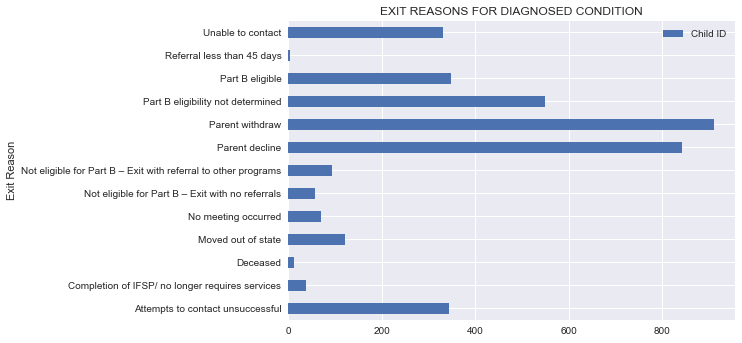

In [48]:
diagnosis_chart = diag_eval.plot(title="EXIT REASONS FOR DIAGNOSED CONDITION", x='Exit Reason', y=['Child ID'], kind='barh')

In [49]:
dev_and_diag_eval =timeline_df_redo_drop_agg_index.loc[timeline_df_redo_drop_agg_index['Init. Elig. Category'].isin(['Diagnosed Condition, Developmental Evaluation'])]
dev_and_diag_eval

,Init. Elig. Category,Exit Reason,Child ID
27,"Diagnosed Condition, Developmental Evaluation",Attempts to contact unsuccessful,455
28,"Diagnosed Condition, Developmental Evaluation",Completion of IFSP/ no longer requires services,22
29,"Diagnosed Condition, Developmental Evaluation",Deceased,28
30,"Diagnosed Condition, Developmental Evaluation",Moved out of state,170
31,"Diagnosed Condition, Developmental Evaluation",No meeting occurred,57
32,"Diagnosed Condition, Developmental Evaluation",Not eligible for Part B – Exit with no referrals,57
33,"Diagnosed Condition, Developmental Evaluation",Not eligible for Part B – Exit with referral t...,86
34,"Diagnosed Condition, Developmental Evaluation",Parent decline,314
35,"Diagnosed Condition, Developmental Evaluation",Parent withdraw,923
36,"Diagnosed Condition, Developmental Evaluation",Part B eligibility not determined,615


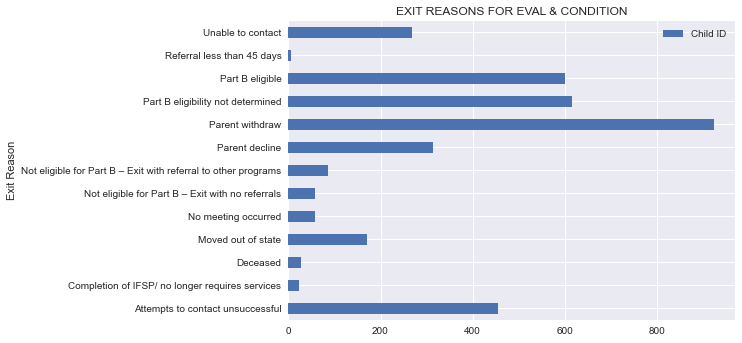

In [50]:
dev_and_diag_chart = dev_and_diag_eval.plot(title="EXIT REASONS FOR EVAL & CONDITION", x='Exit Reason', y=['Child ID'], kind='barh')

In [51]:
merged_exit_reasons = dev_eval.merge(diag_eval, left_on='Exit Reason', right_on='Exit Reason')
merged_exit_reasons

,Init. Elig. Category_x,Exit Reason,Child ID_x,Init. Elig. Category_y,Child ID_y
0,Developmental Evaluation,Attempts to contact unsuccessful,1923,Diagnosed Condition,343
1,Developmental Evaluation,Completion of IFSP/ no longer requires services,218,Diagnosed Condition,38
2,Developmental Evaluation,Deceased,23,Diagnosed Condition,11
3,Developmental Evaluation,Moved out of state,760,Diagnosed Condition,122
4,Developmental Evaluation,No meeting occurred,250,Diagnosed Condition,69
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590,Diagnosed Condition,57
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758,Diagnosed Condition,94
7,Developmental Evaluation,Parent decline,1753,Diagnosed Condition,842
8,Developmental Evaluation,Parent withdraw,5277,Diagnosed Condition,910
9,Developmental Evaluation,Part B eligibility not determined,5550,Diagnosed Condition,550


1) looking only at timeline dataframe
2) delete all columns except exit reason, eligibility, and child id
3) aggregate 
4) change indexes
5) seperate into three different dfs based on eligibility category
6) merge all three dfs
7) rename colunms "child id" to 'Diagnosed Condition, Developmental Evaluation','Diagnosed Condition', 'Developmental Evaluation'

In [52]:
merged_exit_reasons_all = merged_exit_reasons.merge(dev_and_diag_eval, left_on='Exit Reason', right_on='Exit Reason')
merged_exit_reasons_all

,Init. Elig. Category_x,Exit Reason,Child ID_x,Init. Elig. Category_y,Child ID_y,Init. Elig. Category,Child ID
0,Developmental Evaluation,Attempts to contact unsuccessful,1923,Diagnosed Condition,343,"Diagnosed Condition, Developmental Evaluation",455
1,Developmental Evaluation,Completion of IFSP/ no longer requires services,218,Diagnosed Condition,38,"Diagnosed Condition, Developmental Evaluation",22
2,Developmental Evaluation,Deceased,23,Diagnosed Condition,11,"Diagnosed Condition, Developmental Evaluation",28
3,Developmental Evaluation,Moved out of state,760,Diagnosed Condition,122,"Diagnosed Condition, Developmental Evaluation",170
4,Developmental Evaluation,No meeting occurred,250,Diagnosed Condition,69,"Diagnosed Condition, Developmental Evaluation",57
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590,Diagnosed Condition,57,"Diagnosed Condition, Developmental Evaluation",57
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758,Diagnosed Condition,94,"Diagnosed Condition, Developmental Evaluation",86
7,Developmental Evaluation,Parent decline,1753,Diagnosed Condition,842,"Diagnosed Condition, Developmental Evaluation",314
8,Developmental Evaluation,Parent withdraw,5277,Diagnosed Condition,910,"Diagnosed Condition, Developmental Evaluation",923
9,Developmental Evaluation,Part B eligibility not determined,5550,Diagnosed Condition,550,"Diagnosed Condition, Developmental Evaluation",615


In [53]:
renamed_df=merged_exit_reasons_all.rename(columns={'Child ID_x':'Developmental Evaluation', 'Child ID_y':'Diagnosed Condition', 'Child ID':'Diagnosed Condition, Developmental Evaluation'})
renamed_df


,Init. Elig. Category_x,Exit Reason,Developmental Evaluation,Init. Elig. Category_y,Diagnosed Condition,Init. Elig. Category,"Diagnosed Condition, Developmental Evaluation"
0,Developmental Evaluation,Attempts to contact unsuccessful,1923,Diagnosed Condition,343,"Diagnosed Condition, Developmental Evaluation",455
1,Developmental Evaluation,Completion of IFSP/ no longer requires services,218,Diagnosed Condition,38,"Diagnosed Condition, Developmental Evaluation",22
2,Developmental Evaluation,Deceased,23,Diagnosed Condition,11,"Diagnosed Condition, Developmental Evaluation",28
3,Developmental Evaluation,Moved out of state,760,Diagnosed Condition,122,"Diagnosed Condition, Developmental Evaluation",170
4,Developmental Evaluation,No meeting occurred,250,Diagnosed Condition,69,"Diagnosed Condition, Developmental Evaluation",57
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590,Diagnosed Condition,57,"Diagnosed Condition, Developmental Evaluation",57
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758,Diagnosed Condition,94,"Diagnosed Condition, Developmental Evaluation",86
7,Developmental Evaluation,Parent decline,1753,Diagnosed Condition,842,"Diagnosed Condition, Developmental Evaluation",314
8,Developmental Evaluation,Parent withdraw,5277,Diagnosed Condition,910,"Diagnosed Condition, Developmental Evaluation",923
9,Developmental Evaluation,Part B eligibility not determined,5550,Diagnosed Condition,550,"Diagnosed Condition, Developmental Evaluation",615


In [201]:
renamed_df_two = renamed_df.replace(to_replace=['Diagnosed Condition, Developmental Evaluation'], value='Both')
renamed_df_two
                                

# relace_df =timeline_df_redo_drop.replace(to_replace=['Part B eligible','Not eligible for Part B – Exit with no referrals',
                                                       # 'Not eligible for Part B – Exit with referral to other programs', 
                                                       # 'Part B eligibility not determined'], value="Part B")

# need replace to change diag and dev to both

,Init. Elig. Category_x,Exit Reason,Developmental Evaluation,Init. Elig. Category_y,Diagnosed Condition,Init. Elig. Category,"Diagnosed Condition, Developmental Evaluation"
0,Developmental Evaluation,Attempts to contact unsuccessful,1923,Diagnosed Condition,343,Both,455
1,Developmental Evaluation,Completion of IFSP/ no longer requires services,218,Diagnosed Condition,38,Both,22
2,Developmental Evaluation,Deceased,23,Diagnosed Condition,11,Both,28
3,Developmental Evaluation,Moved out of state,760,Diagnosed Condition,122,Both,170
4,Developmental Evaluation,No meeting occurred,250,Diagnosed Condition,69,Both,57
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590,Diagnosed Condition,57,Both,57
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758,Diagnosed Condition,94,Both,86
7,Developmental Evaluation,Parent decline,1753,Diagnosed Condition,842,Both,314
8,Developmental Evaluation,Parent withdraw,5277,Diagnosed Condition,910,Both,923
9,Developmental Evaluation,Part B eligibility not determined,5550,Diagnosed Condition,550,Both,615


In [207]:
renamed_df_three = timeline_df_redo.replace(to_replace=['Diagnosed Condition, Developmental Evaluation'], value='Both')
renamed_df_three

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,Both,2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67605,UC,509553,Inactive,IFSP,2021-10-03,2021-10-22,System,2021-08-19,2021-08-26,2021-08-23 00:00:00,...,0.0,3.0,35.0,47.0,54.0,Eligible,Both,2021-10-12,2021-12-10,618 - Moved out of state
67606,UC,509684,Inactive,IFSP,2021-10-07,2021-09-07,NaN,2021-08-23,2021-08-31,2021-08-24 00:00:00,...,0.0,7.0,0.0,2.0,10.0,Eligible,Developmental Evaluation,2021-09-02,2022-03-07,618 - Parent withdraw
67607,UC,526338,Inactive,IFSP,2022-05-22,2022-05-05,NaN,2022-04-07,2022-04-10,2022-04-08 00:00:00,...,1.0,3.0,0.0,2.0,6.0,Eligible,Developmental Evaluation,2022-04-13,2022-07-25,618 - Parent withdraw
67608,UC,511641,Inactive,Eligibility,2021-11-22,NaT,NaN,2021-10-08,2021-10-18,2021-10-11 00:00:00,...,0.0,7.0,NaN,11.0,21.0,Eligible,Diagnosed Condition,2021-10-29,2022-06-22,Parent decline


In [188]:
renamed_df.sort_index()

,Init. Elig. Category_x,Exit Reason,Developmental Evaluation,Init. Elig. Category_y,Diagnosed Condition,Init. Elig. Category,"Diagnosed Condition, Developmental Evaluation"
0,Developmental Evaluation,Attempts to contact unsuccessful,1923,Diagnosed Condition,343,"Diagnosed Condition, Developmental Evaluation",455
1,Developmental Evaluation,Completion of IFSP/ no longer requires services,218,Diagnosed Condition,38,"Diagnosed Condition, Developmental Evaluation",22
2,Developmental Evaluation,Deceased,23,Diagnosed Condition,11,"Diagnosed Condition, Developmental Evaluation",28
3,Developmental Evaluation,Moved out of state,760,Diagnosed Condition,122,"Diagnosed Condition, Developmental Evaluation",170
4,Developmental Evaluation,No meeting occurred,250,Diagnosed Condition,69,"Diagnosed Condition, Developmental Evaluation",57
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590,Diagnosed Condition,57,"Diagnosed Condition, Developmental Evaluation",57
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758,Diagnosed Condition,94,"Diagnosed Condition, Developmental Evaluation",86
7,Developmental Evaluation,Parent decline,1753,Diagnosed Condition,842,"Diagnosed Condition, Developmental Evaluation",314
8,Developmental Evaluation,Parent withdraw,5277,Diagnosed Condition,910,"Diagnosed Condition, Developmental Evaluation",923
9,Developmental Evaluation,Part B eligibility not determined,5550,Diagnosed Condition,550,"Diagnosed Condition, Developmental Evaluation",615


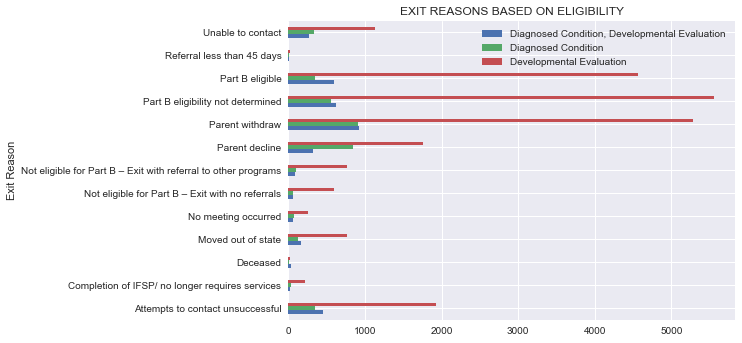

In [205]:
chart_one = renamed_df_two.plot(title="EXIT REASONS BASED ON ELIGIBILITY",x='Exit Reason', y=['Diagnosed Condition, Developmental Evaluation','Diagnosed Condition', 'Developmental Evaluation'], kind='barh')
plt.style.use('seaborn')




# Should I be looking at the entire dataset vs 5595 children that have completed the program? Since we're looking at exit reasons now instead of outcome data?

# df.plot(x="Word", y=["Percentage1", "Percentage2"], kind="bar")

In [208]:
renamed_df_three['Exit Reason'].value_counts()

Parent decline                                                          12725
Ineligible for Part C                                                   10340
Unable to contact                                                        8748
618 - Parent withdraw                                                    7111
618 - Part B eligibility not determined                                  6715
618 - Part B eligible                                                    5508
618 - Attempts to contact unsuccessful                                   2721
No meeting occurred                                                      1920
618 - Moved out of state                                                 1052
618 - Not eligible for Part B – Exit with referral to other programs      938
618 - Not eligible for Part B – Exit with no referrals                    704
Referral less than 45 days                                                608
618 - Completion of IFSP/ no longer requires services           

In [209]:
renamed_df_three['Init. Elig. Category'].value_counts()

Developmental Evaluation    28317
Both                         5298
Diagnosed Condition          4675
Name: Init. Elig. Category, dtype: int64

In [168]:
timeline_df_redo.shape

(67610, 38)

In [169]:
timeline_df_redo.isna().sum()

District                                                0
Child ID                                                0
Child Status                                            0
Child Phase                                             0
Init. IFSP Due Date                                     0
IFSP Due Date                                       34373
IFSP Late Reason                                    62830
Active Ref. Date                                        0
Parent Consent/Intake Date                          18400
Date Dev. Evaluator Rec'd. Ref.                      5536
Date Assigned to Dev. Evaluator                      5536
Dates Dev. Evaluator Attempted to Contact Family    11965
Date Dev. Evaluator Actually Contacted Family       17447
Dates Med. Records Requested                        33744
Date Med. Records Rec'd                             31154
Date Med. Records Entered                           31089
TEIS Vision Screening Form?                             0
TEIS Hearing S

In [170]:
timeline_df_redo['Init. Elig. Category'].value_counts(dropna = False)

NaN                                              29320
Developmental Evaluation                         28317
Diagnosed Condition, Developmental Evaluation     5298
Diagnosed Condition                               4675
Name: Init. Elig. Category, dtype: int64

In [173]:
timeline_df_redo['Exit Reason'].value_counts(dropna = False)

Parent decline                                                          12725
Ineligible for Part C                                                   10340
Unable to contact                                                        8748
NaN                                                                      8154
618 - Parent withdraw                                                    7111
618 - Part B eligibility not determined                                  6715
618 - Part B eligible                                                    5508
618 - Attempts to contact unsuccessful                                   2721
No meeting occurred                                                      1920
618 - Moved out of state                                                 1052
618 - Not eligible for Part B – Exit with referral to other programs      938
618 - Not eligible for Part B – Exit with no referrals                    704
Referral less than 45 days                                      

# Should we be removing the rows where there is a null value for either Eligibility Category OR Exit Reason?

38290-30137=8154 (nulls in exit reasons)


In [171]:
timeline_df_redo['Init. Elig. Category'].value_counts(normalize = True)

Developmental Evaluation                         0.739540
Diagnosed Condition, Developmental Evaluation    0.138365
Diagnosed Condition                              0.122095
Name: Init. Elig. Category, dtype: float64

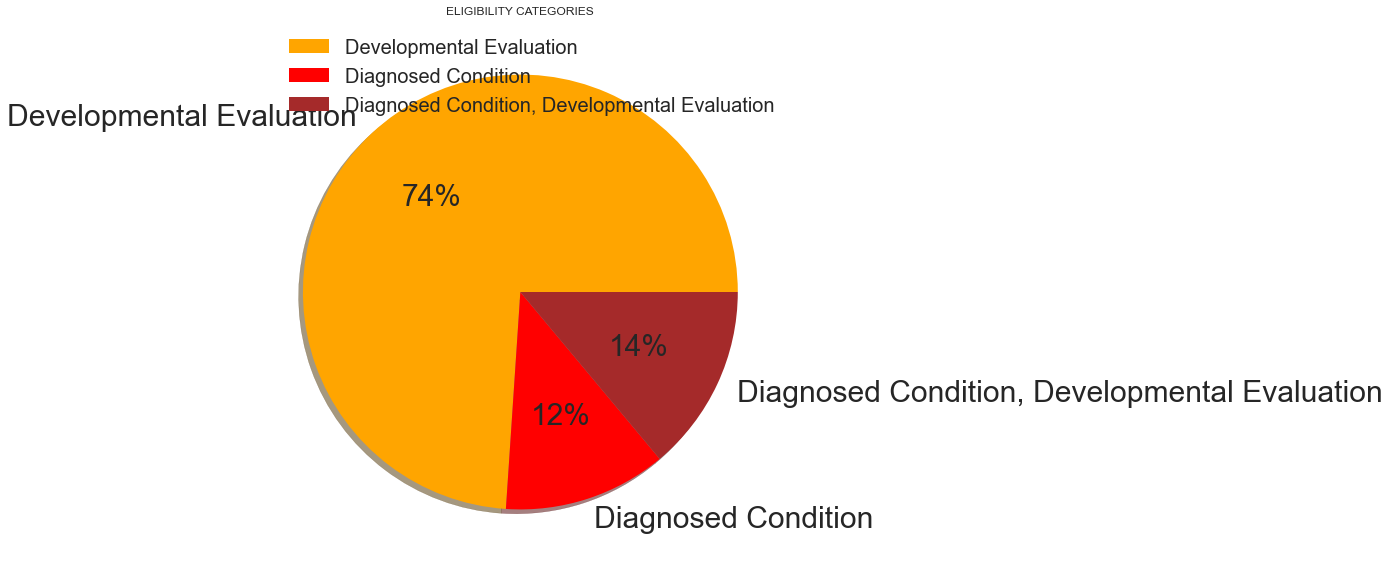

In [214]:
timeline_df_redo.groupby(['Init. Elig. Category']).sum().plot(kind='pie', y='Child ID', ylabel='',autopct='%1.0f%%', colors = ['orange', 'red', 'brown'],
                                title='ELIGIBILITY CATEGORIES', shadow=True, figsize=(10,10), fontsize=30)

plt.legend(fontsize=20)

<AxesSubplot:title={'center':'Eligibility Categories'}>

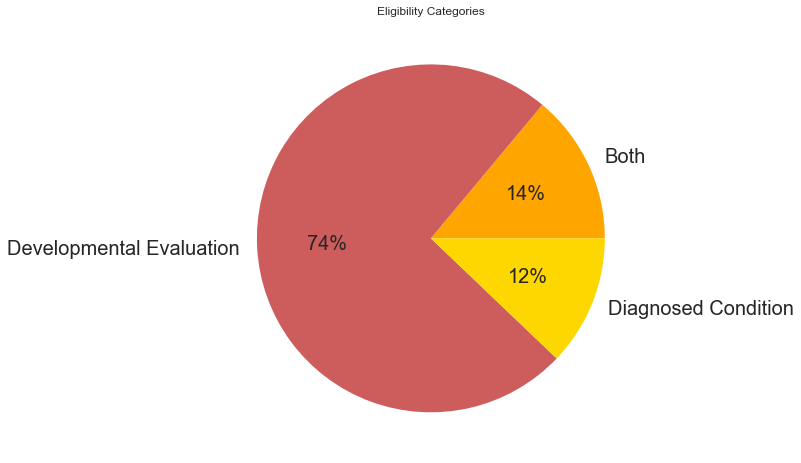

In [243]:
renamed_df_three.groupby(['Init. Elig. Category']).sum().plot(kind='pie', y='Child ID', ylabel='',autopct='%1.0f%%', legend=False,colors = ['orange', 'indianred', 'gold'],
                                title='Eligibility Categories', figsize=(8,8), fontsize=20)

# colors gold, orange, indian red

# plt.legend(fontsize=20)

# plt.legend(loc='upper right', bbox_to_anchor=(1,1))


In [55]:
plt.style.use('seaborn')

In [56]:
new_df=timeline_df_redo_drop.groupby(['Init. Elig. Category']).count()
new_df

,Child ID,Exit Reason
Init. Elig. Category,,
Developmental Evaluation,28317,22819
Diagnosed Condition,4675,3718
"Diagnosed Condition, Developmental Evaluation",5298,3600


In [57]:
new_df_index=new_df.reset_index()
new_df_index

,Init. Elig. Category,Child ID,Exit Reason
0,Developmental Evaluation,28317,22819
1,Diagnosed Condition,4675,3718
2,"Diagnosed Condition, Developmental Evaluation",5298,3600


In [ ]:
timeline_df_redo

,Child ID,Exit Reason
Init. Elig. Category,,
Developmental Evaluation,28317,22819
Diagnosed Condition,4675,3718
"Diagnosed Condition, Developmental Evaluation",5298,3600


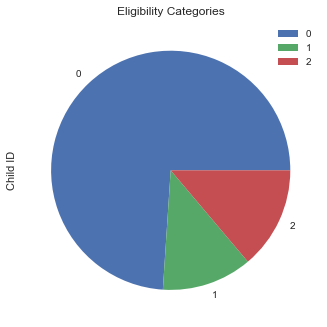

In [70]:
pie_chart = new_df_index.plot(title="Eligibility Categories",y='Child ID', x='Init. Elig. Category', kind='pie')

plt.style.use('seaborn')


# The kind of plot to produce:

# ‘line’ : line plot (default)

# ‘bar’ : vertical bar plot

# ‘barh’ : horizontal bar plot

# ‘hist’ : histogram

# ‘box’ : boxplot

# ‘kde’ : Kernel Density Estimation plot

# ‘density’ : same as ‘kde’

# ‘area’ : area plot

# ‘pie’ : pie plot

# ‘scatter’ : scatter plot (DataFrame only)

# ‘hexbin’ : hexbin plot (DataFrame only)


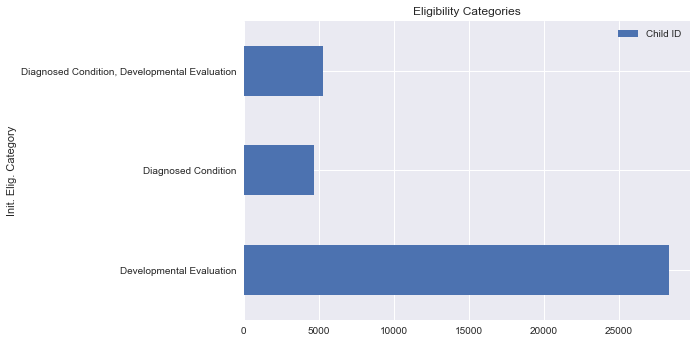

In [71]:
bar_chart = new_df_index.plot(title="Eligibility Categories",y='Child ID', x='Init. Elig. Category', kind='barh')

In [72]:
exploding_pie_chart=timeline_df_redo_drop_agg_index.groupby(['Init. Elig. Category']).sum().plot(kind='pie', y='Child ID', autopct='%1.0f%%', colors = ['orange', 'red', 'brown'],
                                title='ELIGIBILITY CATEGORIES', explode = explode)

 explode = (0.5, 0.5, 0.5)

IndentationError: unexpected indent (1560061912.py, line 4)

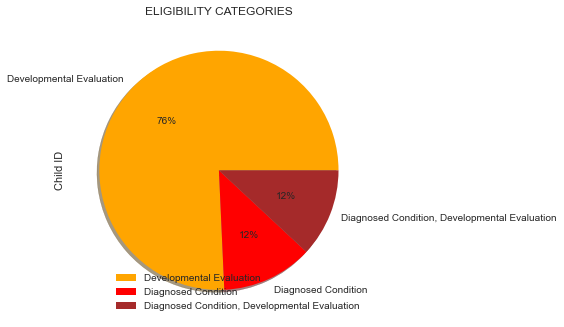

In [185]:
timeline_df_redo_drop_agg_index.groupby(['Init. Elig. Category']).sum().plot(kind='pie', y='Child ID', autopct='%1.0f%%', colors = ['orange', 'red', 'brown'],
                                title='ELIGIBILITY CATEGORIES', shadow=True)

plt.legend(loc='lower right')



bbox_to_anchor=(5,2)
# plt.legend 
# bbox to anchor, loc=lower right

# matplotlib.pyplot.legend([“blue”, “green”], bbox_to_anchor=(0.75, 1.15), ncol=2)

# explode = (0.5, 0.5, 0.5)

<AxesSubplot:xlabel='Init. Elig. Category'>

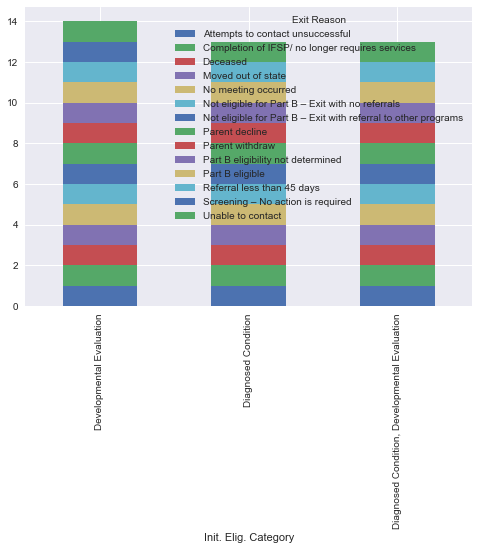

In [62]:
timeline_df_redo_drop_agg_index.groupby(['Init. Elig. Category', 'Exit Reason']).size().unstack().plot(kind='bar', stacked=True)
# timeline_df_redo_drop_agg_index.groupby(['Init. Elig. Category'])size().unstack().plot(kind='bar', stacked=True)



<AxesSubplot:ylabel='Init. Elig. Category'>

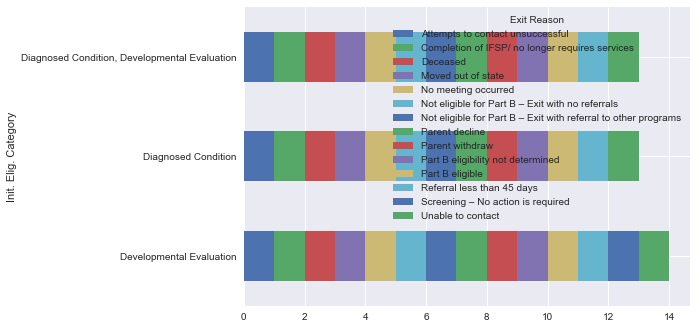

In [63]:
timeline_df_redo_drop_agg_index.groupby(['Init. Elig. Category', 'Exit Reason']).size().unstack().plot(kind='barh', stacked=True)
# timeline_df_redo_drop_agg_index.groupby(['Init. Elig. Category'])size().unstack().plot(kind='bar', stacked=True)

In [64]:
renamed_df

,Init. Elig. Category_x,Exit Reason,Developmental Evaluation,Init. Elig. Category_y,Diagnosed Condition,Init. Elig. Category,"Diagnosed Condition, Developmental Evaluation"
0,Developmental Evaluation,Attempts to contact unsuccessful,1923,Diagnosed Condition,343,"Diagnosed Condition, Developmental Evaluation",455
1,Developmental Evaluation,Completion of IFSP/ no longer requires services,218,Diagnosed Condition,38,"Diagnosed Condition, Developmental Evaluation",22
2,Developmental Evaluation,Deceased,23,Diagnosed Condition,11,"Diagnosed Condition, Developmental Evaluation",28
3,Developmental Evaluation,Moved out of state,760,Diagnosed Condition,122,"Diagnosed Condition, Developmental Evaluation",170
4,Developmental Evaluation,No meeting occurred,250,Diagnosed Condition,69,"Diagnosed Condition, Developmental Evaluation",57
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590,Diagnosed Condition,57,"Diagnosed Condition, Developmental Evaluation",57
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758,Diagnosed Condition,94,"Diagnosed Condition, Developmental Evaluation",86
7,Developmental Evaluation,Parent decline,1753,Diagnosed Condition,842,"Diagnosed Condition, Developmental Evaluation",314
8,Developmental Evaluation,Parent withdraw,5277,Diagnosed Condition,910,"Diagnosed Condition, Developmental Evaluation",923
9,Developmental Evaluation,Part B eligibility not determined,5550,Diagnosed Condition,550,"Diagnosed Condition, Developmental Evaluation",615


In [65]:
timeline_df_redo_drop_agg_index

,Init. Elig. Category,Exit Reason,Child ID
0,Developmental Evaluation,Attempts to contact unsuccessful,1923
1,Developmental Evaluation,Completion of IFSP/ no longer requires services,218
2,Developmental Evaluation,Deceased,23
3,Developmental Evaluation,Moved out of state,760
4,Developmental Evaluation,No meeting occurred,250
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758
7,Developmental Evaluation,Parent decline,1753
8,Developmental Evaluation,Parent withdraw,5277
9,Developmental Evaluation,Part B eligibility not determined,5550


In [77]:
# 'Part B eligibility not determined'
# Part B eligible	
# Not eligible for Part B – Exit with no referrals
# Not eligible for Part B – Exit with referral to other programs

# subset =gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004,2009,2014])]
# subset

subset_test_one =timeline_df_redo_drop_agg_index.loc[timeline_df_redo_drop_agg_index['Exit Reason'].
                                                 isin(['Part B eligible','Not eligible for Part B – Exit with no referrals',
                                                       'Not eligible for Part B – Exit with referral to other programs', 
                                                       'Part B eligibility not determined'])]
subset_test_one


,Init. Elig. Category,Exit Reason,Child ID
5,Developmental Evaluation,Not eligible for Part B – Exit with no referrals,590
6,Developmental Evaluation,Not eligible for Part B – Exit with referral t...,758
9,Developmental Evaluation,Part B eligibility not determined,5550
10,Developmental Evaluation,Part B eligible,4560
19,Diagnosed Condition,Not eligible for Part B – Exit with no referrals,57
20,Diagnosed Condition,Not eligible for Part B – Exit with referral t...,94
23,Diagnosed Condition,Part B eligibility not determined,550
24,Diagnosed Condition,Part B eligible,347
32,"Diagnosed Condition, Developmental Evaluation",Not eligible for Part B – Exit with no referrals,57
33,"Diagnosed Condition, Developmental Evaluation",Not eligible for Part B – Exit with referral t...,86


In [78]:
part_b =timeline_df_redo_drop.loc[timeline_df_redo_drop['Exit Reason'].
                                                 isin(['Part B eligible','Not eligible for Part B – Exit with no referrals',
                                                       'Not eligible for Part B – Exit with referral to other programs', 
                                                       'Part B eligibility not determined'])]
part_b

,Child ID,Init. Elig. Category,Exit Reason
0,453926,Developmental Evaluation,Part B eligible
1,431729,"Diagnosed Condition, Developmental Evaluation",Part B eligibility not determined
2,462474,Developmental Evaluation,Part B eligibility not determined
5,446765,Developmental Evaluation,Not eligible for Part B – Exit with no referrals
7,465218,Developmental Evaluation,Part B eligibility not determined
...,...,...,...
67593,507417,Developmental Evaluation,Part B eligible
67596,509584,Developmental Evaluation,Part B eligible
67597,507764,Developmental Evaluation,Part B eligible
67599,514221,Developmental Evaluation,Part B eligibility not determined


<AxesSubplot:title={'center':'Distribution of Eligibility Categories for Kids Who Age Out'}, ylabel='Eligibility Category'>

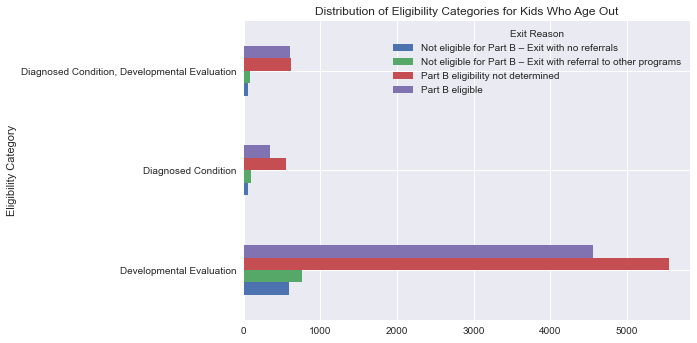

In [84]:
part_b.groupby(['Init. Elig. Category', 'Exit Reason']).size().unstack().plot
(kind='barh', xlabel="Eligibility Category", title='Distribution of Eligibility Categories for Kids Who Age Out')

<AxesSubplot:title={'center':'Distribution of Eligibility Categories for Kids Who Age Out'}, ylabel='Eligibility Category'>

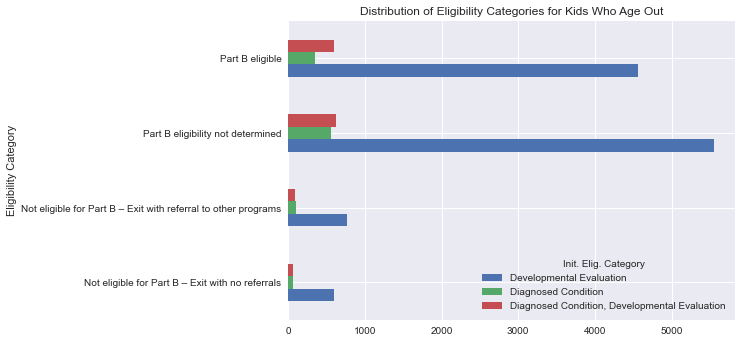

In [91]:
part_b.groupby(['Exit Reason','Init. Elig. Category']).size().unstack().plot(kind='barh', xlabel="Eligibility Category", title='Distribution of Eligibility Categories for Kids Who Age Out')

In [106]:
not_part_b =timeline_df_redo_drop.loc[timeline_df_redo_drop['Exit Reason'].
                                                 isin(['Attempts to contact unsuccessful',
'Completion of IFSP/ no longer requires services',
'Deceased',
'Moved out of state',
'No meeting occurred',
'Parent decline',
'Parent withdraw',
'Referral less than 45 days',
'Unable to contact', 
'Screening – No action is required'])]



not_part_b

,Child ID,Init. Elig. Category,Exit Reason
3,446841,Diagnosed Condition,Parent decline
4,459629,Developmental Evaluation,Parent withdraw
6,437348,Developmental Evaluation,Parent withdraw
10,427633,"Diagnosed Condition, Developmental Evaluation",Moved out of state
18,452112,Developmental Evaluation,Parent withdraw
...,...,...,...
67604,516841,Developmental Evaluation,Parent withdraw
67605,509553,"Diagnosed Condition, Developmental Evaluation",Moved out of state
67606,509684,Developmental Evaluation,Parent withdraw
67607,526338,Developmental Evaluation,Parent withdraw


<AxesSubplot:title={'center':'Distribution of Eligibility Categories for Kids who Leave for Other Reasons'}, ylabel='Eligibility Category'>

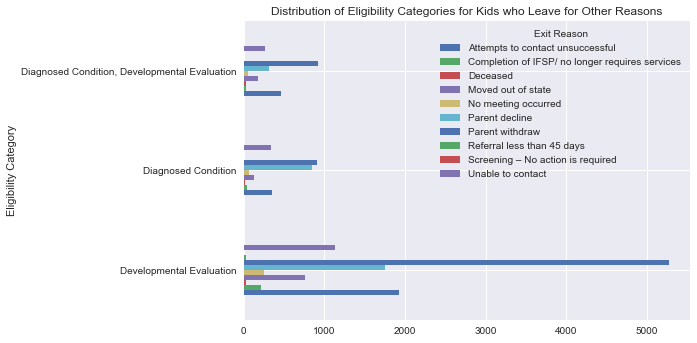

In [107]:
not_part_b.groupby(['Init. Elig. Category', 'Exit Reason']).size().unstack().plot(kind='barh', xlabel="Eligibility Category", title='Distribution of Eligibility Categories for Kids who Leave for Other Reasons')

<AxesSubplot:title={'center':'Distribution of Eligibility Categories for Kids who Leave for Other Reasons'}, ylabel='Eligibility Category'>

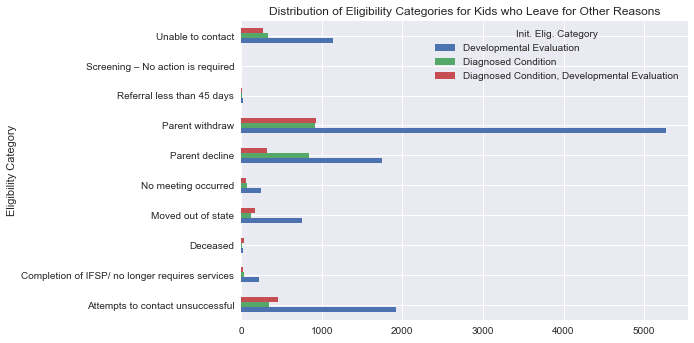

In [108]:
not_part_b.groupby(['Exit Reason','Init. Elig. Category']).size().unstack().plot(kind='barh', xlabel="Eligibility Category", title='Distribution of Eligibility Categories for Kids who Leave for Other Reasons')

In [109]:
# df.replace(to_replace=["Boston Celtics", "Texas"],value="Omega Warrior")

relace_df =timeline_df_redo_drop.replace(to_replace=['Part B eligible','Not eligible for Part B – Exit with no referrals',
                                                       'Not eligible for Part B – Exit with referral to other programs', 
                                                       'Part B eligibility not determined'], value="Part B")

In [96]:
relace_df

,Child ID,Init. Elig. Category,Exit Reason
0,453926,Developmental Evaluation,Part B
1,431729,"Diagnosed Condition, Developmental Evaluation",Part B
2,462474,Developmental Evaluation,Part B
3,446841,Diagnosed Condition,Parent decline
4,459629,Developmental Evaluation,Parent withdraw
...,...,...,...
67605,509553,"Diagnosed Condition, Developmental Evaluation",Moved out of state
67606,509684,Developmental Evaluation,Parent withdraw
67607,526338,Developmental Evaluation,Parent withdraw
67608,511641,Diagnosed Condition,Parent decline


<AxesSubplot:ylabel='Eligibility Category'>

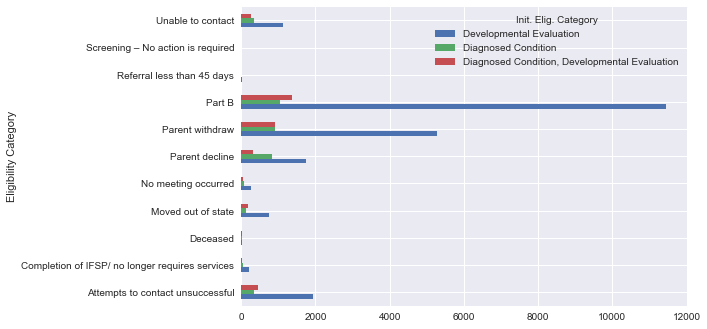

In [97]:
relace_df.groupby(['Exit Reason','Init. Elig. Category']).size().unstack().plot(kind='barh', xlabel="Eligibility Category")

In [124]:
replace_df=timeline_df_redo_drop.replace(to_replace=['Completion of IFSP/ no longer requires services',
'Deceased',
'Moved out of state',
'No meeting occurred',
'Parent decline',
'Parent withdraw',
'Referral less than 45 days',
'Unable to contact', 
'Screening – No action is required',
'Ineligible for Part C',
'Attempts to contact unsuccessful'], value="Other")

# relace_df =timeline_df_redo_drop.replace(to_replace=['Part B eligible','Not eligible for Part B – Exit with no referrals',
#                                                        'Not eligible for Part B – Exit with referral to other programs', 
#                                                        'Part B eligibility not determined'], value="Part B")

In [111]:
replace_df

,Child ID,Init. Elig. Category,Exit Reason
0,453926,Developmental Evaluation,Part B eligible
1,431729,"Diagnosed Condition, Developmental Evaluation",Part B eligibility not determined
2,462474,Developmental Evaluation,Part B eligibility not determined
3,446841,Diagnosed Condition,Other
4,459629,Developmental Evaluation,Other
...,...,...,...
67605,509553,"Diagnosed Condition, Developmental Evaluation",Other
67606,509684,Developmental Evaluation,Other
67607,526338,Developmental Evaluation,Other
67608,511641,Diagnosed Condition,Other


In [132]:
replace_df_one =replace_df.replace(to_replace=['Part B eligible','Not eligible for Part B – Exit with no referrals',
                                                       'Not eligible for Part B – Exit with referral to other programs', 
                                                       'Part B eligibility not determined'], value="Aged Out of Program")

In [133]:
replace_df_one

,Child ID,Init. Elig. Category,Exit Reason
0,453926,Developmental Evaluation,Aged Out of Program
1,431729,"Diagnosed Condition, Developmental Evaluation",Aged Out of Program
2,462474,Developmental Evaluation,Aged Out of Program
3,446841,Diagnosed Condition,Other
4,459629,Developmental Evaluation,Other
...,...,...,...
67605,509553,"Diagnosed Condition, Developmental Evaluation",Other
67606,509684,Developmental Evaluation,Other
67607,526338,Developmental Evaluation,Other
67608,511641,Diagnosed Condition,Other


<AxesSubplot:ylabel='Aged Out vs Other'>

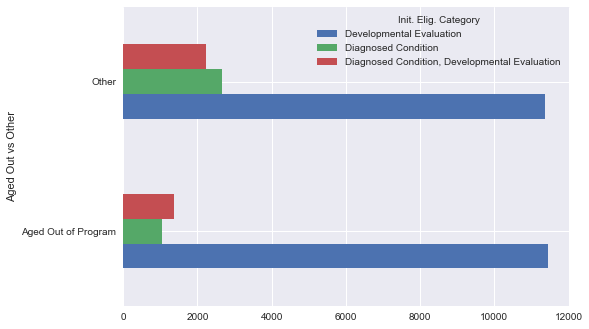

In [135]:
replace_df_one.groupby(['Exit Reason','Init. Elig. Category']).size().unstack().plot(kind='barh', xlabel="Aged Out vs Other")

consider percentages

graph that talks about first two categories ()


stacked bar: each bar is an eligibility category

<AxesSubplot:ylabel='Eligibility Category'>

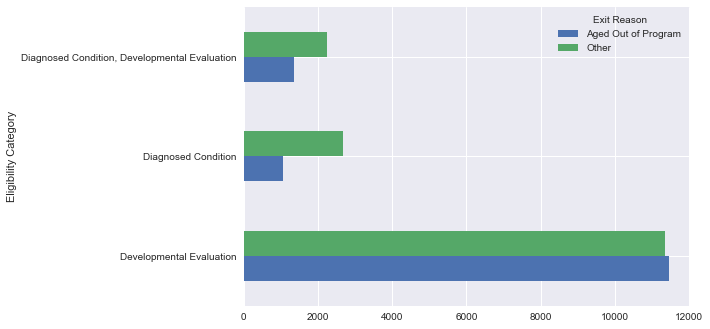

In [136]:
replace_df_one.groupby(['Init. Elig. Category','Exit Reason']).size().unstack().plot(kind='barh', xlabel="Eligibility Category")

# Do exit reasons vary by eligibility category? Do more children in one eligibility category age out compared to leaving for other reasons?

In [139]:
replace_df_one['Exit Reason'].value_counts()

Other                  45591
Aged Out of Program    13865
Name: Exit Reason, dtype: int64

In [138]:
timeline_df_redo_drop['Exit Reason'].value_counts().sum()

59456

In [142]:
diagnosis=replace_df_one.loc[replace_df_one['Init. Elig. Category'].isin(['Diagnosed Condition'])]
diagnosis

,Child ID,Init. Elig. Category,Exit Reason
3,446841,Diagnosed Condition,Other
16,451526,Diagnosed Condition,Aged Out of Program
20,459059,Diagnosed Condition,Aged Out of Program
23,450729,Diagnosed Condition,Other
24,450731,Diagnosed Condition,Other
...,...,...,...
67510,499521,Diagnosed Condition,Other
67543,471413,Diagnosed Condition,Aged Out of Program
67555,478966,Diagnosed Condition,Other
67556,478967,Diagnosed Condition,Other


<AxesSubplot:title={'center':'Diagnosed Condition: Aging Out vs Other'}, ylabel='Child ID'>

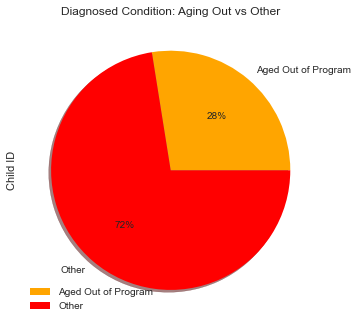

In [147]:
diagnosis.groupby(['Exit Reason']).sum().plot(y='Child ID', kind='pie', autopct='%1.0f%%', colors = ['orange', 'red'],
                                title='Diagnosed Condition: Aging Out vs Other', shadow=True)

In [152]:
developmental=replace_df_one.loc[replace_df_one['Init. Elig. Category'].isin(['Developmental Evaluation'])]
developmental


,Child ID,Init. Elig. Category,Exit Reason
0,453926,Developmental Evaluation,Aged Out of Program
2,462474,Developmental Evaluation,Aged Out of Program
4,459629,Developmental Evaluation,Other
5,446765,Developmental Evaluation,Aged Out of Program
6,437348,Developmental Evaluation,Other
...,...,...,...
67603,525915,Developmental Evaluation,Other
67604,516841,Developmental Evaluation,Other
67606,509684,Developmental Evaluation,Other
67607,526338,Developmental Evaluation,Other


<AxesSubplot:title={'center':'Developmental Evaluation: Aging Out vs Other'}, ylabel='Child ID'>

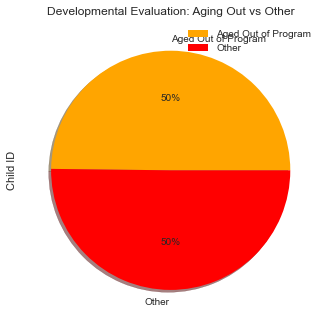

In [154]:
developmental.groupby(['Exit Reason']).sum().plot(y='Child ID', kind='pie', autopct='%1.0f%%', colors = ['orange', 'red'],
                                title='Developmental Evaluation: Aging Out vs Other', shadow=True)

In [155]:
developmental_diagnosis=replace_df_one.loc[replace_df_one['Init. Elig. Category'].isin(['Diagnosed Condition, Developmental Evaluation'])]
developmental_diagnosis

,Child ID,Init. Elig. Category,Exit Reason
1,431729,"Diagnosed Condition, Developmental Evaluation",Aged Out of Program
10,427633,"Diagnosed Condition, Developmental Evaluation",Other
32,445289,"Diagnosed Condition, Developmental Evaluation",Other
33,448009,"Diagnosed Condition, Developmental Evaluation",Other
43,438450,"Diagnosed Condition, Developmental Evaluation",Aged Out of Program
...,...,...,...
67497,510438,"Diagnosed Condition, Developmental Evaluation",NaN
67501,528249,"Diagnosed Condition, Developmental Evaluation",NaN
67520,518770,"Diagnosed Condition, Developmental Evaluation",Other
67588,506474,"Diagnosed Condition, Developmental Evaluation",Other


<AxesSubplot:title={'center':'Diagnosed Condition, Developmental Evaluation: Aging Out vs Other'}, ylabel='Child ID'>

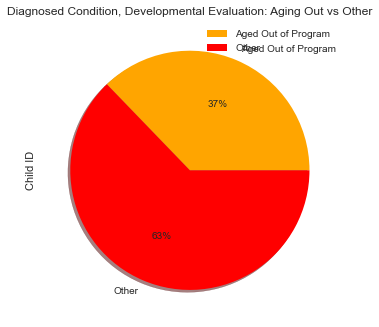

In [156]:
developmental_diagnosis.groupby(['Exit Reason']).sum().plot(y='Child ID', kind='pie', autopct='%1.0f%%', colors = ['orange', 'red'],
                                title='Diagnosed Condition, Developmental Evaluation: Aging Out vs Other', shadow=True)

<AxesSubplot:xlabel='Eligibility Category'>

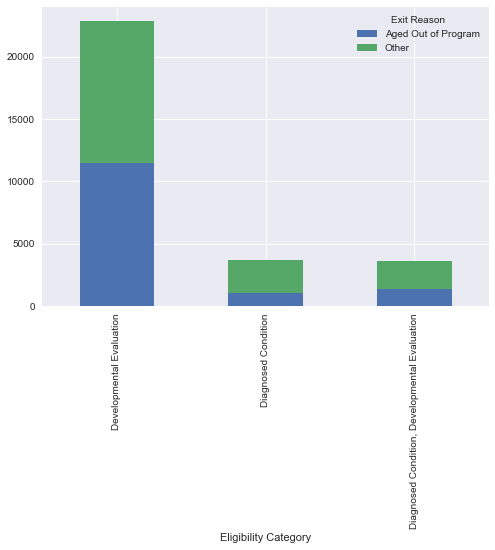

In [157]:
# timeline_df_redo_drop_agg_index.groupby(['Init. Elig. Category', 'Exit Reason']).size().unstack().plot(kind='bar', stacked=True)
# timeline_df_redo_drop_agg_index.groupby(['Init. Elig. Category'])size().unstack().plot(kind='bar', stacked=True)

replace_df_one.groupby(['Init. Elig. Category','Exit Reason']).size().unstack().plot(kind='bar',stacked=True, xlabel="Eligibility Category")